# Student Performance Predictor - Data Exploration

This notebook explores the student performance dataset and visualizes relationships between features.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


**Reasoning**:
This cell imports essential libraries like pandas for data handling, numpy for numerical operations, matplotlib and seaborn for data visualization. It also configures plot aesthetics for better presentation. This setup ensures all necessary tools are ready for data processing and graphical representation.

## 1. Load Data

In [34]:
# Load data
df = pd.read_csv('/content/student_data.csv')

print(f"Dataset Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
df.head()

Dataset Shape: (1000, 7)

Columns: ['study_hours', 'past_scores', 'attendance', 'habits', 'exam_score', 'study_level', 'past_performance']


,study_hours,past_scores,attendance,habits,exam_score,study_level,past_performance
0,11.97,43.91,91.51,7.29,47.94,Medium,Poor
1,7.47,63.75,83.62,5.72,50.16,Low,Average
2,6.91,42.43,77.19,6.79,47.30,Low,Poor
3,6.91,76.40,89.97,9.08,74.22,Low,Good
4,23.25,66.24,90.52,8.68,65.03,High,Average


**Reasoning**:
This cell loads the student performance data from a CSV file into a DataFrame. It then displays the dataset's shape (rows, columns) and lists all column names. Finally, it previews the first five rows of the DataFrame. These steps are crucial for an initial understanding of the dataset's structure and content.

## 2. Basic Statistics

In [35]:
# Statistical summary
df.describe()

,study_hours,past_scores,attendance,habits,exam_score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,10.299800,65.146070,79.530520,7.170780,55.196720
std,7.014379,14.390435,12.223921,1.557308,8.471209
min,0.230000,19.710000,36.940000,1.570000,32.170000
25%,5.132500,55.362500,72.015000,6.147500,49.210000
50%,8.645000,65.160000,81.510000,7.360000,54.920000
75%,13.715000,74.990000,89.172500,8.392500,61.190000
max,38.930000,100.000000,99.670000,9.970000,80.590000


**Reasoning**:
This cell generates a statistical summary of all numerical columns in the DataFrame. It provides key descriptive statistics such as count, mean, standard deviation, and quartiles. This helps in understanding the central tendency, spread, and potential outliers within the numerical data. It's a quick way to get an overview of data characteristics.

In [36]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Data types
print("\nData Types:")
print(df.dtypes)

Missing Values:
study_hours         0
past_scores         0
attendance          0
habits              0
exam_score          0
study_level         0
past_performance    0
dtype: int64

Data Types:
study_hours         float64
past_scores         float64
attendance          float64
habits              float64
exam_score          float64
study_level          object
past_performance     object
dtype: object


**Reasoning**:
This cell checks for any missing values across all columns of the DataFrame. It also displays the data types of each column. Identifying missing data and confirming correct data types are vital steps. This ensures data quality and proper handling in subsequent analysis.

## 3. Feature Distributions

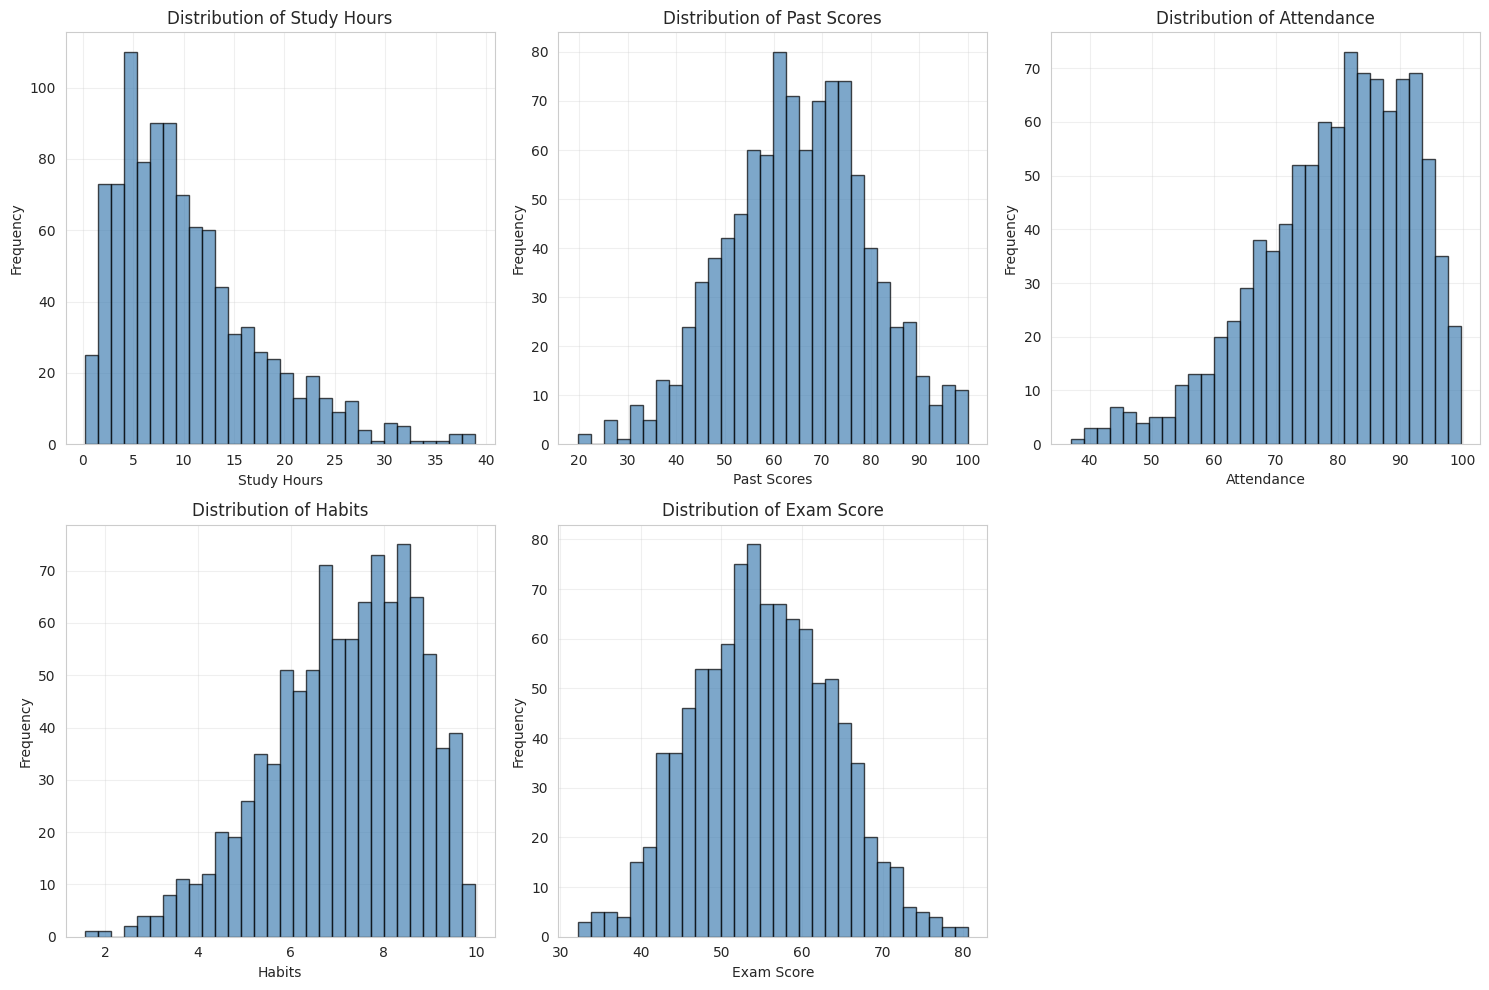

In [37]:
# Plot distributions of all numerical features
numerical_cols = ['study_hours', 'past_scores', 'attendance', 'habits', 'exam_score']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    axes[idx].set_xlabel(col.replace('_', ' ').title())
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Distribution of {col.replace("_", " ").title()}')
    axes[idx].grid(True, alpha=0.3)

# Remove extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

**Reasoning**:
This cell visualizes the distribution of all numerical features using histograms. Histograms help to understand the frequency of values within different ranges for each variable. This visual inspection can reveal insights into data skewness, modality, and potential anomalies. It's a foundational step in exploratory data analysis.

## 4. Correlation Analysis

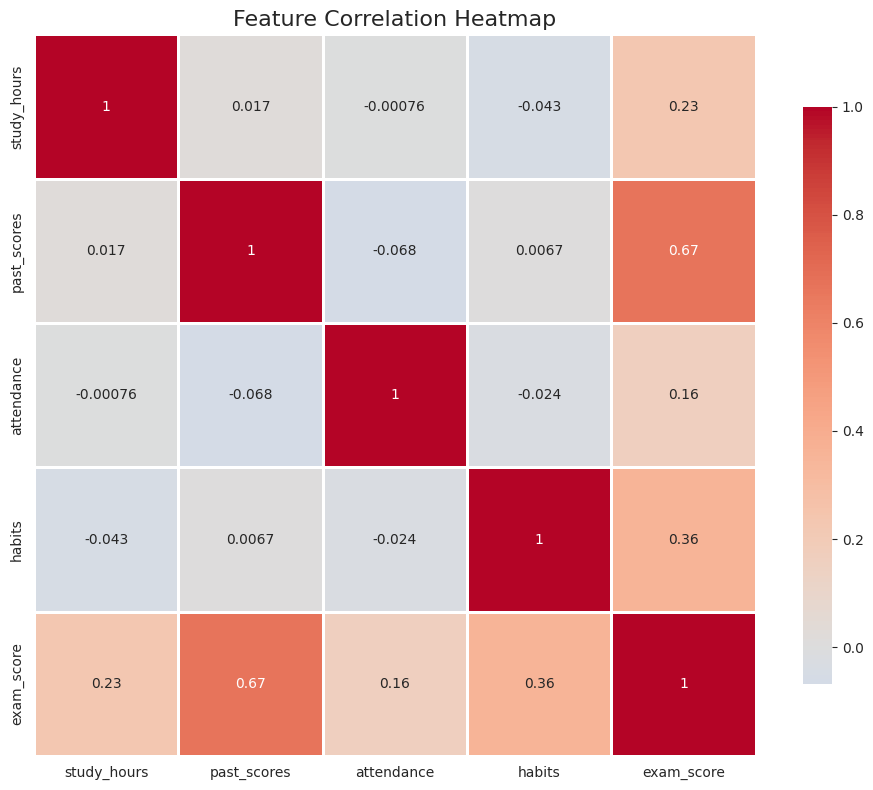


Correlations with Exam Score:
exam_score     1.000000
past_scores    0.668187
habits         0.361202
study_hours    0.228460
attendance     0.161207
Name: exam_score, dtype: float64


In [38]:
# Correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

# Print correlations with exam_score
print("\nCorrelations with Exam Score:")
print(correlation_matrix['exam_score'].sort_values(ascending=False))

**Reasoning**:
This cell computes and visualizes the correlation matrix of numerical features using a heatmap. The heatmap quickly highlights linear relationships between variables, with color intensity indicating correlation strength. It then specifically prints correlations with 'exam_score' to identify key predictors. This helps understand how features influence the target variable.

## 5. Feature Relationships with Target

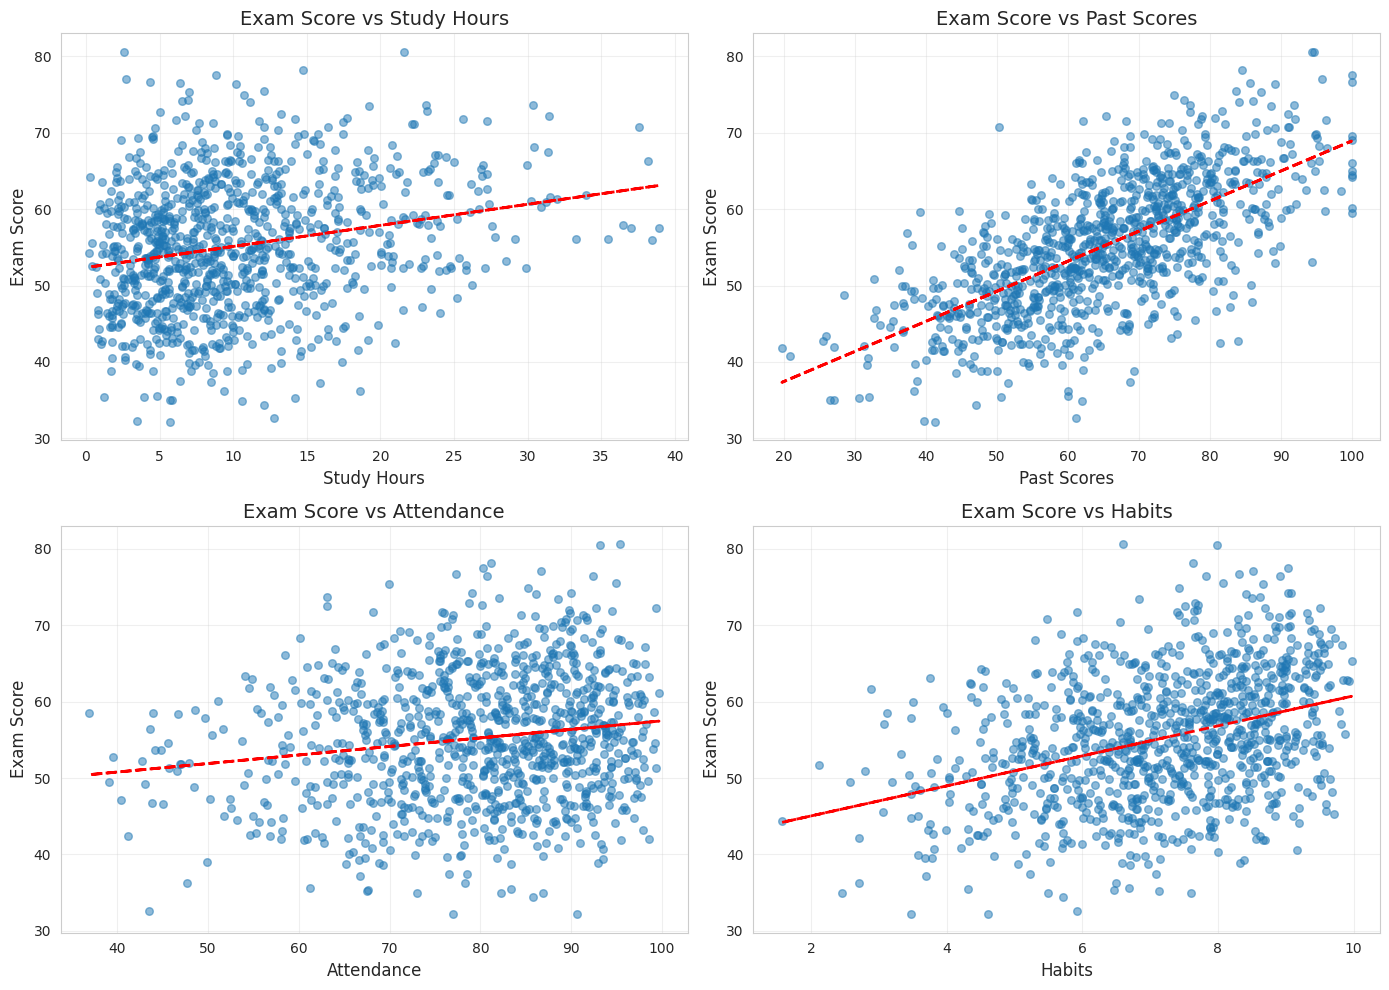

In [39]:
# Scatter plots with regression lines
features = ['study_hours', 'past_scores', 'attendance', 'habits']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, feature in enumerate(features):
    axes[idx].scatter(df[feature], df['exam_score'], alpha=0.5, s=30)

    # Add regression line
    z = np.polyfit(df[feature], df['exam_score'], 1)
    p = np.poly1d(z)
    axes[idx].plot(df[feature], p(df[feature]), "r--", linewidth=2)

    axes[idx].set_xlabel(feature.replace('_', ' ').title(), fontsize=12)
    axes[idx].set_ylabel('Exam Score', fontsize=12)
    axes[idx].set_title(f'Exam Score vs {feature.replace("_", " ").title()}', fontsize=14)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Reasoning**:
This cell generates scatter plots for selected features against 'exam_score', including a linear regression line on each plot. These plots visually represent the relationship between individual features and the exam score. The regression lines indicate the linear trend, helping to observe positive or negative correlations. It's useful for understanding feature impact visually.

## 6. Box Plots

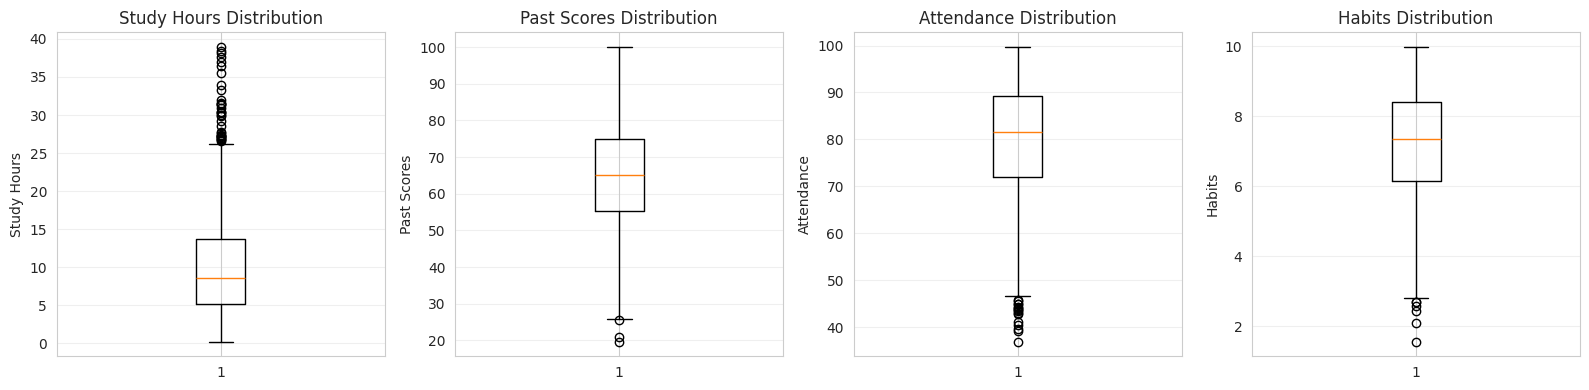

In [40]:
# Box plots for all features
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for idx, feature in enumerate(features):
    axes[idx].boxplot(df[feature])
    axes[idx].set_ylabel(feature.replace('_', ' ').title())
    axes[idx].set_title(f'{feature.replace("_", " ").title()} Distribution')
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

**Reasoning**:
This cell generates box plots for the selected features. Box plots illustrate the distribution of each variable through their median, quartiles, and potential outliers. They are excellent for identifying data spread, central tendency, and the presence of extreme values. This provides a concise summary of the data's variability.

## 7. Pair Plot

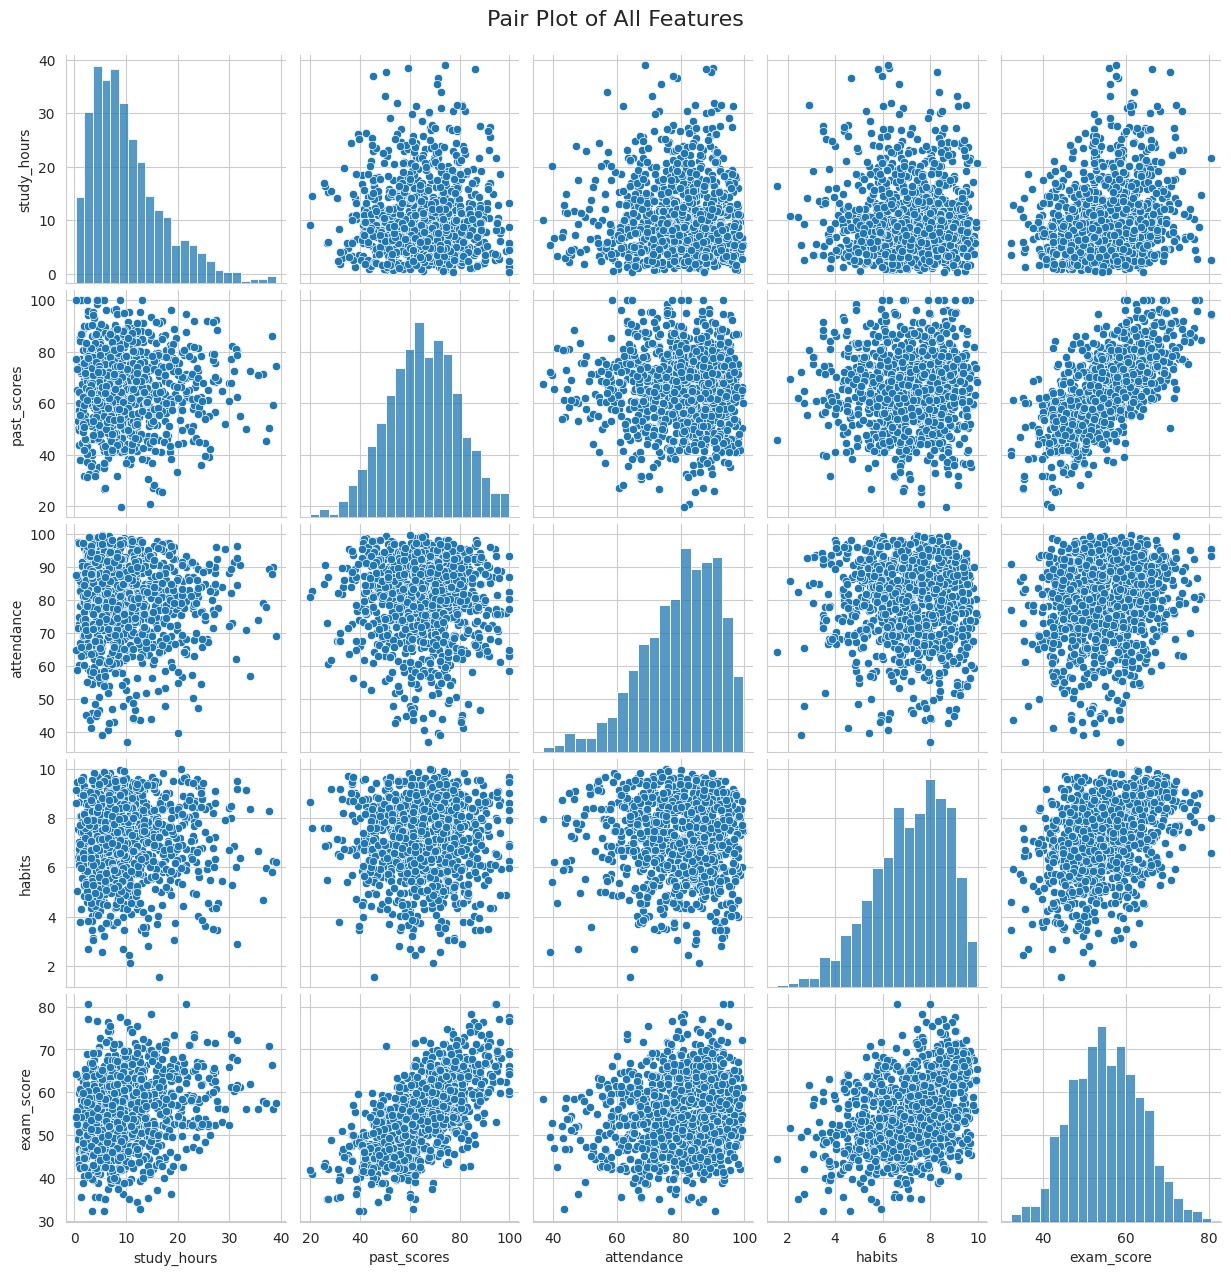

In [41]:
# Pair plot for all features
sns.pairplot(df[numerical_cols], diag_kind='hist', height=2.5)
plt.suptitle('Pair Plot of All Features', y=1.02, fontsize=16)
plt.show()

**Reasoning**:
This cell generates a pair plot for all numerical features in the dataset. A pair plot displays scatter plots for every pair of features and histograms for individual features on the diagonal. This comprehensive visualization helps in simultaneously observing distributions and bivariate relationships. It's a powerful tool for initial multi-feature exploration.

## 8. Performance Categories Analysis

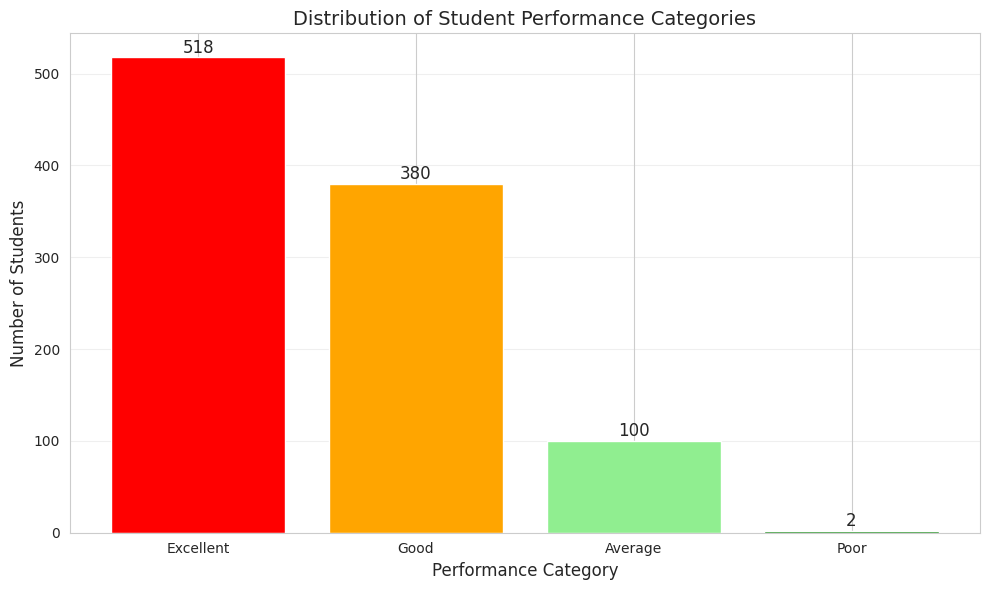


Performance Category Distribution:
performance_category
Excellent    518
Good         380
Average      100
Poor           2
Name: count, dtype: int64


In [53]:
# Create performance categories
df['performance_category'] = pd.cut(df['exam_score'],
                                    bins=[0, 40, 60, 80, 100],
                                    labels=['Poor', 'Average', 'Good', 'Excellent'])

# Count plot
plt.figure(figsize=(10, 6))
category_counts = df['performance_category'].value_counts()
plt.bar(category_counts.index.astype(str), category_counts.values,
        color=['red', 'orange', 'lightgreen', 'green'])
plt.xlabel('Performance Category', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Distribution of Student Performance Categories', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, v in enumerate(category_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

print("\nPerformance Category Distribution:")
print(category_counts)

**Reasoning**:
This cell categorizes student 'exam_score' into performance levels ('Poor', 'Average', 'Good', 'Excellent') and then visualizes their distribution. It creates a count plot to show the number of students in each category. This provides a clear overview of the overall student performance landscape. Value labels on bars enhance readability.

## 9. Feature Importance - Statistical Tests

Feature Importance (Correlation with Exam Score):
             correlation        p_value
past_scores     0.668187  2.529039e-130
habits          0.361202   3.511375e-32
study_hours     0.228460   2.623908e-13
attendance      0.161207   2.975641e-07


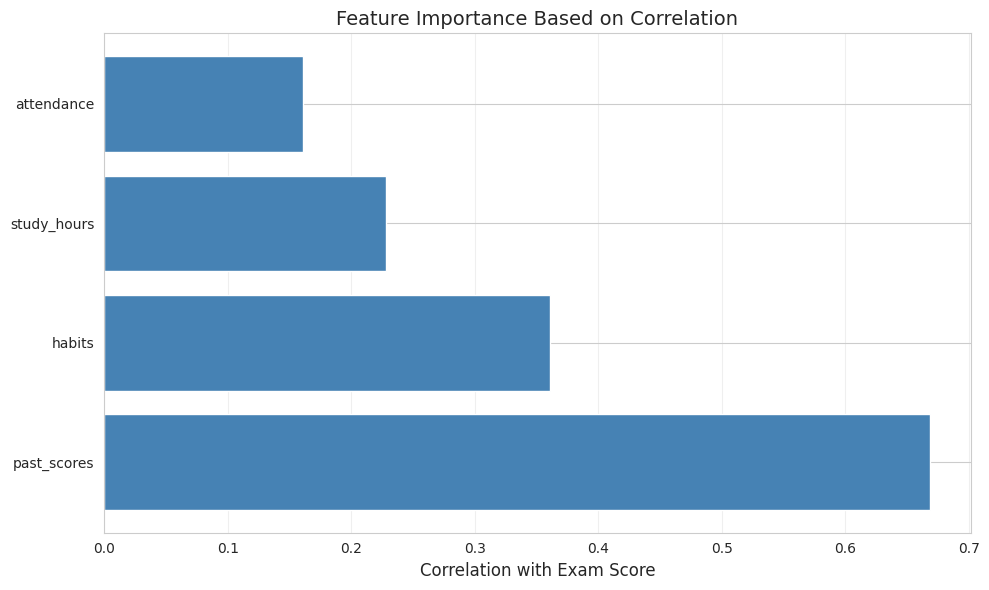

In [43]:
# Calculate correlation coefficients and p-values
from scipy.stats import pearsonr

feature_importance = {}

for feature in features:
    corr, p_value = pearsonr(df[feature], df['exam_score'])
    feature_importance[feature] = {'correlation': corr, 'p_value': p_value}

importance_df = pd.DataFrame(feature_importance).T
importance_df = importance_df.sort_values('correlation', ascending=False)

print("Feature Importance (Correlation with Exam Score):")
print(importance_df)

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(importance_df.index, importance_df['correlation'], color='steelblue')
plt.xlabel('Correlation with Exam Score', fontsize=12)
plt.title('Feature Importance Based on Correlation', fontsize=14)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

**Reasoning**:
This cell calculates Pearson correlation coefficients and p-values for each feature against 'exam_score'. It assesses the statistical significance and strength of linear relationships. The results are then visualized with a horizontal bar plot, ranking features by their correlation. This identifies and highlights the most important predictors of exam scores.

## 10. Key Insights and Observations

In [44]:
print("KEY INSIGHTS:")
print("="*60)

# 1. Most important feature
most_important = importance_df.index[0]
print(f"\n1. Most Important Feature: {most_important.replace('_', ' ').title()}")
print(f"   Correlation: {importance_df.loc[most_important, 'correlation']:.4f}")

# 2. Average scores
print(f"\n2. Average Exam Score: {df['exam_score'].mean():.2f}")
print(f"   Standard Deviation: {df['exam_score'].std():.2f}")

# 3. Performance categories
print(f"\n3. Performance Categories:")
print(f"   Excellent (80-100): {(df['exam_score'] >= 80).sum()} students")
print(f"   Good (60-80): {((df['exam_score'] >= 60) & (df['exam_score'] < 80)).sum()} students")
print(f"   Average (40-60): {((df['exam_score'] >= 40) & (df['exam_score'] < 60)).sum()} students")
print(f"   Poor (<40): {(df['exam_score'] < 40).sum()} students")

# 4. Top performers characteristics
top_performers = df[df['exam_score'] >= 80]
print(f"\n4. Top Performers (Score >= 80) Characteristics:")
print(f"   Average Study Hours: {top_performers['study_hours'].mean():.2f}")
print(f"   Average Past Scores: {top_performers['past_scores'].mean():.2f}")
print(f"   Average Attendance: {top_performers['attendance'].mean():.2f}%")
print(f"   Average Habits Score: {top_performers['habits'].mean():.2f}")

print("\n" + "="*60)

KEY INSIGHTS:

1. Most Important Feature: Past Scores
   Correlation: 0.6682

2. Average Exam Score: 55.20
   Standard Deviation: 8.47

3. Performance Categories:
   Excellent (80-100): 2 students
   Good (60-80): 291 students
   Average (40-60): 676 students
   Poor (<40): 31 students

4. Top Performers (Score >= 80) Characteristics:
   Average Study Hours: 12.08
   Average Past Scores: 94.52
   Average Attendance: 94.30%
   Average Habits Score: 7.29



**Reasoning**:
This cell consolidates key insights and observations derived from the preceding analysis. It summarizes the most important features influencing exam scores, average score statistics, and performance category distributions. It also outlines characteristics of top-performing students, providing a high-level overview of findings. This acts as a concise summary of the EDA.

In [47]:
from sklearn.linear_model import LinearRegression

# 1. Define the features (independent variables)
X = df[['study_hours', 'past_scores', 'attendance', 'habits']]

# 2. Define the target variable
y = df['exam_score']

# 3. Create an instance of the LinearRegression model
model = LinearRegression()

# 4. Train the model
model.fit(X, y)

# 5. Print the coefficients and intercept
print("Linear Regression Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature.replace('_', ' ').title()}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

Linear Regression Model Coefficients:
  Study Hours: 2.6798
  Past Scores: 0.3786
  Attendance: 0.2079
  Habits: 2.2292
Intercept: 20.9769


**Reasoning**:
This cell trains a simple linear regression model using `scikit-learn`. It defines features (`X`) and the target variable (`y`) from the dataset. The model learns the linear relationship between inputs and exam scores. It then prints the coefficients and intercept, showing how each feature contributes to the predicted exam score.

In [50]:
print("\nEnter student data for prediction:")
student_data = {}
student_data['study_hours'] = get_validated_input("Enter study hours (0-10): ", 0, 10)
student_data['past_scores'] = get_validated_input("Enter past scores (30-95): ", 30, 95)
student_data['attendance'] = get_validated_input("Enter attendance (50-100): ", 50, 100)
student_data['habits'] = get_validated_input("Enter habits score (1-5): ", 1, 5)

print("\nCollected student data:")
for feature, value in student_data.items():
    print(f"  {feature.replace('_', ' ').title()}: {value}")


Enter student data for prediction:
Enter study hours (0-10): 5
Enter past scores (30-95): 35
Enter attendance (50-100): 60
Enter habits score (1-5): 2

Collected student data:
  Study Hours: 5.0
  Past Scores: 35.0
  Attendance: 60.0
  Habits: 2.0


**Reasoning**:
This cell implements an interactive interface to collect new student data from the user. It uses a custom `get_validated_input` function to ensure inputs are numerical and within specified ranges. The collected 'study_hours', 'past_scores', 'attendance', and 'habits' are stored. This facilitates real-time user interaction for predictions.

In [51]:
import pandas as pd

# Convert the collected student data into a DataFrame for prediction
new_student_df = pd.DataFrame([student_data])

# Make a prediction using the trained model
predicted_score = model.predict(new_student_df)

print(f"\nPredicted Exam Score for this student: {predicted_score[0]:.2f}")


Predicted Exam Score for this student: 64.56


In [52]:
def categorize_performance(score):
    if score < 40:
        return 'Poor'
    elif 40 <= score < 60:
        return 'Average'
    elif 60 <= score < 80:
        return 'Good'
    else:
        return 'Excellent'

# Categorize the predicted score
performance_category = categorize_performance(predicted_score[0])

print(f"\nPredicted Exam Score for this student: {predicted_score[0]:.2f}")
print(f"Performance Category: {performance_category}")


Predicted Exam Score for this student: 64.56
Performance Category: Good
